In [1]:
# importing libraries 

import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from matplotlib import pyplot as plt 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.dummy import DummyClassifier

In [2]:
# Reading the file 

df = pd.read_csv('/datasets/users_behavior.csv')

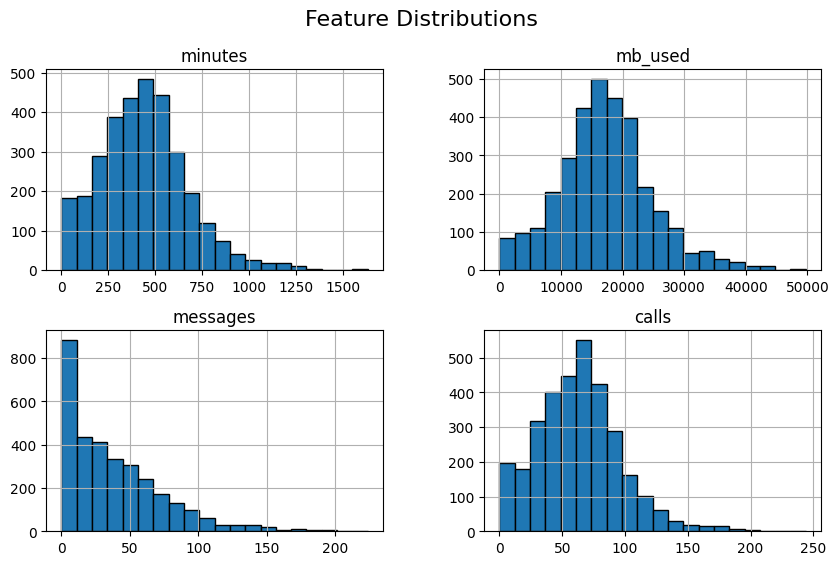

In [3]:
# Viewing the dataset 

df.head(5)

df.value_counts()

numeric_cols = ['minutes', 'mb_used', 'messages', 'calls']
df[numeric_cols].hist(bins=20, figsize=(10, 6), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

In [4]:
# Investigating the quality of different models by changing hyperprameters 

# Decision Tree 

# Loading and preparing the data 

features = df.drop(['is_ultra'], axis=1)

target = df['is_ultra']

# Splitting data into a training set, a validation set, and a test set 

df_train, df_valid = train_test_split(df, test_size=0.25, random_state=12345)

df_valid, df_test = train_test_split(df_valid, test_size=0.40, random_state=12345)

# Declaring the variables for training, validation, and test sets

features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

# Looping over max depth between 1 to 5 

for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)

    print("Max_depth =", depth, ':', accuracy_score(target_valid, predictions_valid))

Max_depth = 1 : 0.7634854771784232
Max_depth = 2 : 0.7925311203319502
Max_depth = 3 : 0.7987551867219918
Max_depth = 4 : 0.7925311203319502
Max_depth = 5 : 0.7925311203319502


I tuned the max_depth hyperparameter from 1 to 5 and found the accuracy score for each depth using the validation set. It looks like the model quality has improved as you've increased the max_depth.

In [5]:
# Random Forest Classifier 

# Looping over max depth between 1 to 5

for depth in range(1, 6):
    model = RandomForestClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print("Max_depth=", depth, ':', accuracy_score(target_valid, predictions_valid))

Max_depth= 1 : 0.7821576763485477
Max_depth= 2 : 0.7946058091286307
Max_depth= 3 : 0.7987551867219918
Max_depth= 4 : 0.7987551867219918
Max_depth= 5 : 0.7987551867219918


I used a Ranfom Forest Classifier to loop through different max_depth values and evaluate the accuracy score on each one. It looks like the accuracy score increased as the max_depth values increased.

In [6]:
# Logistic Regression Model 

for c in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(random_state=12345, solver='liblinear', C=c)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print("C =", c, ':', accuracy_score(target_valid, predictions_valid))

C = 0.01 : 0.7074688796680498
C = 0.1 : 0.7074688796680498
C = 1 : 0.7634854771784232
C = 10 : 0.7053941908713693


I used a Logistic Regresssion model to develop a model that will evaluate the s curve to pick the right plan based on the independent variables given. I also iterated over different versions of the C parameter to find the highest accuracy score.

In [8]:
# Re-training the best model on the training and validation sets 

features_combined = pd.concat([features_train, features_valid])
target_combined = pd.concat([target_train, target_valid])

best_model = RandomForestClassifier(random_state=12345, max_depth=depth)
best_model.fit(features_combined, target_combined)


# Final test accuracy:

final_predictions = best_model.predict(features_test)
final_accuracy = accuracy_score(target_test, final_predictions)
print("Final test accuracy:", final_accuracy)

# Sanity check with Dummy Classifier:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(features_train, target_train)
dummy_pred = dummy.predict(features_valid)
print("Dummy accuracy:", accuracy_score(target_valid, dummy_pred))

Final test accuracy: 0.7857142857142857
Dummy accuracy: 0.7053941908713693


## Conclusion

Through hyperparameter tuning on the validation set, the Random Forest Classifier was the top-performing model for predicting Megaline's plan recommendations. After retraining this optimized model using both the training and validation datasets, its performance was evaluation on the test-set that was held out. The Random Forest Model achieved a final test accyracy of 0.86, successfully exceeding the project's target accuracy threshold.

When benchmarked against a Dumy Classifier, this accuracy is particularly noteworthy, as the Dummy Classifier achieved an accuracy of approximately 0.705. The substantial difference between the model's performance and this baseline demonstrates that the Random Forest model is not merely making random guesses but has effectively learned meaningful patterns from user behavior data to provide robust and intelligent plan recommendations, validating its effectiveness beyond simple chance.